# Project: Web Scrapping Wikipedia for Aviation Deths and Incidents

This notebook documents a `Web Scrapping` project of extracting a table from `Wikipedia` about the `Deaths` and `Incidents`by Aeroplanes. It will furthur analyse the extracted results visually and derive a conclusion out of it. 

For this project, we have decived to extract our data from [Wikipedia - Aviation accidents and incidents](https://en.wikipedia.org/wiki/Aviation_accidents_and_incidents "Click to Open Source") from where we will be extracting ou required data and plotting it accordingly.

## Step 01 : Web Scrapping

Importing all required `libraries` for `Web Scrapping`

In [1]:
# library to work with dataframes
import pandas as pd

# library to handle requests
import requests 

# library to parse HTML documents
from bs4 import BeautifulSoup

### Pandas Library

The `pandas` library is used to perform analytical operation on the data extracted.

### Requests Library

The `requests` library can be used fetch the content of an entire `HTML` page as a `string` into our `python` workspace. Any data that we retrieve from the content can only be fetched once we have the content in the workspace.

### BeautifulSoup Library

The `BeautifulSoup` library can be used to give an entire `tree structure` to the content of the `HTML` fetched. An `HTML` page will have many tags such as `div`, `p`, `tr`, `td`. This library will tidy up the content for better understanding.


In order to extract the table from the `Wikipedia` page, we need to set the `url` of the page first.

In [2]:
# storing the URL in a variable
wikiurl = "https://en.wikipedia.org/wiki/Aviation_accidents_and_incidents"

In order to select the specific tabel from the HTML page, we `inspect` the page and hover over the table that covers our entire table, just as shown below:

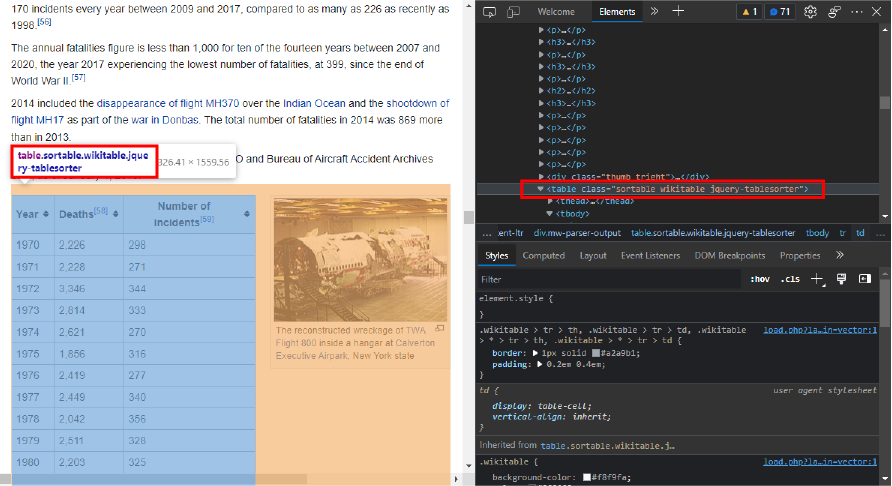

Many tutorials, posts and walkthroughs will choose the `Table ID` instead of the `Table Class` but some tables will have no ID at all just as the one sown above. In such a case, we proceed with the `Table Class` itself.

In [3]:
# storing the table-class in a variable
table_class="wikitable sortable jquery-tablesorter"

# get the response in the form of html
response = requests.get(wikiurl)

Now, `requests` will give back a request response object. These are basically numbers which stand for specific meanings. `Resonse [200]` means that the request was successful whereas `Response [404]`means that it was unsuccessful!

In [4]:
# checking the request response
response

<Response [200]>

This means that we have successfull recieved the content of the HTML whose URL was specified above.

Our next step is to `parse` the response into `BeautifulSoup` Objects. Doing this, we can easily locate `HTML` attributes using `bs4` functions very easily.

In [5]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')

Here, `soup` is a `bs4` object. Let us have a look at what is pulled here:

In [6]:
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Aviation accidents and incidents - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"c680bc84-2d0b-4b76-9d60-bcf63364ca93","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Aviation_accidents_and_incidents","wgTitle":"Aviation accidents and incidents","wgCurRevisionId":1119210721,"wgRevisionId":1119210721,"wgArticleId":164536,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: unfit URL","Articles with short description","Short description is different from Wik

We can clearly see that the entire `HTML` page has been captured here. Now, we locate out table using the `table class` we defined earlier.

In [7]:
# extracting table from bs4 object using table class
data_table = soup.find('table',{'class':"wikitable"})

Let us check if the `table` captured is the right one:

In [8]:
data_table

<table class="sortable wikitable">
<tbody><tr>
<th><b>Year</b></th>
<th><b>Deaths</b><sup class="reference" id="cite_ref-b3aDeaths_58-0"><a href="#cite_note-b3aDeaths-58">[58]</a></sup></th>
<th><b>Number of incidents</b><sup class="reference" id="cite_ref-b3aCrashs_59-0"><a href="#cite_note-b3aCrashs-59">[59]</a></sup>
</th></tr>
<tr>
<td>1970</td>
<td>2,226</td>
<td>298
</td></tr>
<tr>
<td>1971</td>
<td>2,228</td>
<td>271
</td></tr>
<tr>
<td>1972</td>
<td>3,346</td>
<td>344
</td></tr>
<tr>
<td>1973</td>
<td>2,814</td>
<td>333
</td></tr>
<tr>
<td>1974</td>
<td>2,621</td>
<td>270
</td></tr>
<tr>
<td>1975</td>
<td>1,856</td>
<td>316
</td></tr>
<tr>
<td>1976</td>
<td>2,419</td>
<td>277
</td></tr>
<tr>
<td>1977</td>
<td>2,449</td>
<td>340
</td></tr>
<tr>
<td>1978</td>
<td>2,042</td>
<td>356
</td></tr>
<tr>
<td>1979</td>
<td>2,511</td>
<td>328
</td></tr>
<tr>
<td>1980</td>
<td>2,203</td>
<td>325
</td></tr>
<tr>
<td>1981</td>
<td>1,506</td>
<td>272
</td></tr>
<tr>
<td>1982</td>
<td>1,958</t

We can confirm that we can captured the right `table` looking at the `headers`. Now, let us convert this `string table` into a `dataframe` so that we can operate on it!

In [9]:
# using pandas we read the HTML content and save it as a list
df = pd.read_html(str(data_table))

# converting list to dataframe
df=pd.DataFrame(df[0])
df.head()

,Year,Deaths[58],Number of incidents[59]
0,1970,2226,298
1,1971,2228,271
2,1972,3346,344
3,1973,2814,333
4,1974,2621,270


We can see that the `column` names are not safe for other application uses. We rename them as per our ease.

## Step 02 : Data Cleaning

In [10]:
# rename columns for ease
df = df.rename(columns={"Deaths[58]": "Deaths", "Number of incidents[59]" : "Incidents"})
df.head()

,Year,Deaths,Incidents
0,1970,2226,298
1,1971,2228,271
2,1972,3346,344
3,1973,2814,333
4,1974,2621,270


Let us check if the data in the dataframe is of correct data-type. 

In [11]:
df.dtypes

Year          int64
Deaths       object
Incidents     int64
dtype: object

We can see that the `Deaths` columns is of `object` types where it needs to be of either `int32` or int`64` type. But what is the reason for that?

For that, we display the entire dataframe and chaeck for any errors:

In [12]:
df

,Year,Deaths,Incidents
0,1970,2226,298
1,1971,2228,271
2,1972,3346,344
3,1973,2814,333
4,1974,2621,270
5,1975,1856,316
6,1976,2419,277
7,1977,2449,340
8,1978,2042,356
9,1979,2511,328


At `index 31`, we can see that the value of death is `1,539[a]` but it should simply be `1539`. So we change it manually.

In [13]:
df.at[31,"Deaths"] = 1539
df.at[31,"Deaths"]

1539

After we have changed the value, let us try to `typecast` the entire column from `object` to `int32` or `int64`.

In [14]:
df["Deaths"]= df["Deaths"].astype(int)
df.dtypes

Year         int64
Deaths       int32
Incidents    int64
dtype: object

Thus, all the data are in the required format and is now ready to be analysed.

`NOTE` It is important to note that, we changed the value of `index 31` manually only because it was a small dataframe. In case we encounter thousands of rows, we may need to proceed with other measures.

## Step 03 : Data Analysis

The approach of `Data Analysis` depends on what conclusion we are trying to achieve at the end! Since this was originally a `Web Scrapping` project, we will go for simple graphs and plot in thsi section.

In [24]:
# importing library to plot graphs
from matplotlib import pyplot as plt

# importing library for mathematical calculations
import numpy as np

In [16]:
# defining axes for graphs
x = df["Year"]
y1 = df["Deaths"]
y2 = df["Incidents"]

Let us start with a simple plot, showing the tends of `Deaths` per `Year`.

Modifications to the plot has been made as per requirement and can be performed with the help of library `documentation`.

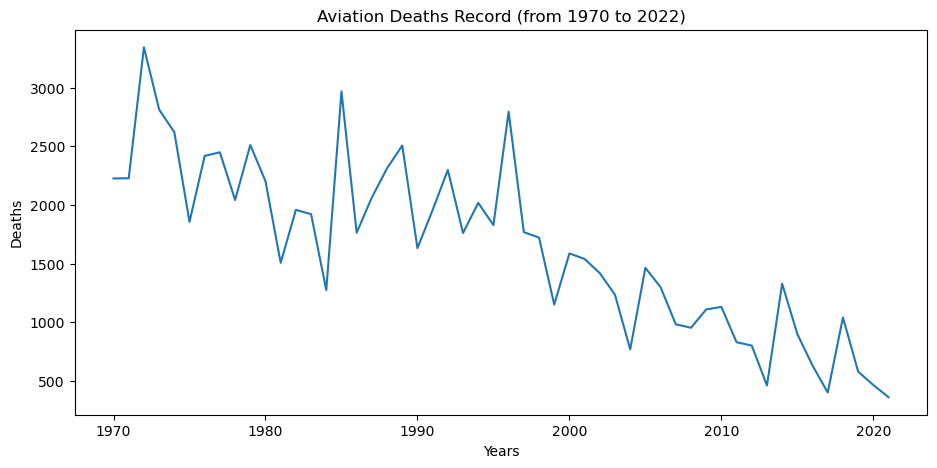

In [34]:
# defining plot size
fig = plt.figure(figsize=(11, 5))

# generating plot
plt.plot(x,y1)

# naming plot
plt.title("Aviation Deaths Record (from 1970 to 2022)")

# naming axes
plt.xlabel("Years")
plt.ylabel("Deaths")

# displaying plot
plt.show()

Then we plot the `Incidents` vs `Years` graph.

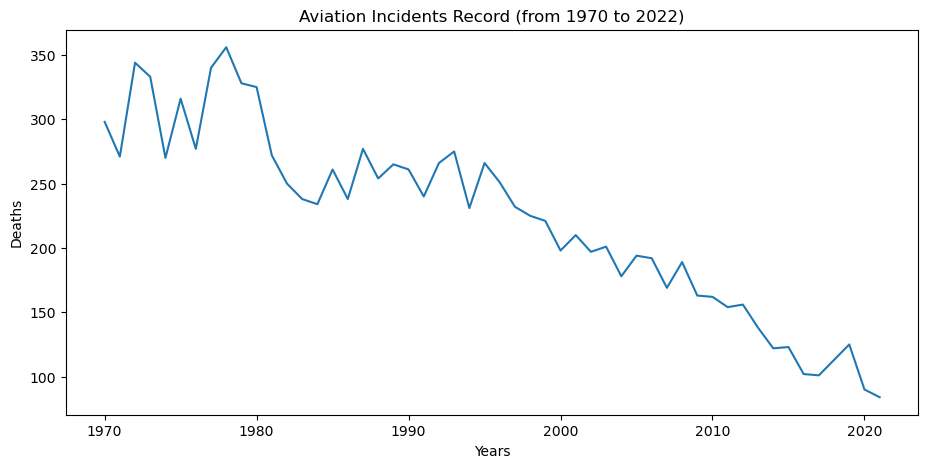

In [33]:
# defining plot size
fig = plt.figure(figsize=(11, 5))

# generating plot
plt.plot(x,y2)

# naming plot
plt.title("Aviation Incidents Record (from 1970 to 2022)")

# naming axes
plt.xlabel("Years")
plt.ylabel("Deaths")

# displaying plot
plt.show()

As we can see that not much we can derive here, instead lets try `scatter` plot this time.

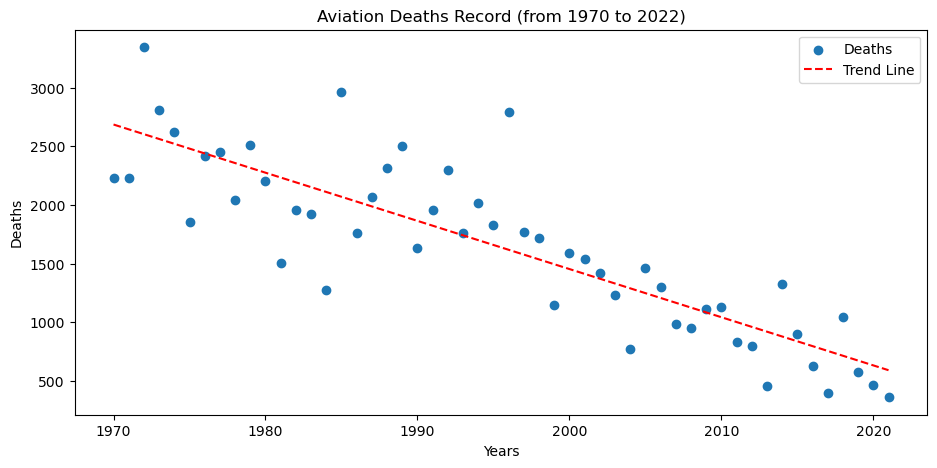

In [36]:
# defining plot size
fig = plt.figure(figsize=(11, 5))

# generating plot
plt.scatter(x,y1)

# naming plot
plt.title("Aviation Deaths Record (from 1970 to 2022)")

# naming axes
plt.xlabel("Years")
plt.ylabel("Deaths")

# displaying plot
#plt.show()

z = np.polyfit(x, y1, 1)
p = np.poly1d(z)

plt.plot(x, p(x), "r--")

plt.legend(["Deaths","Trend Line"])

plt.show()

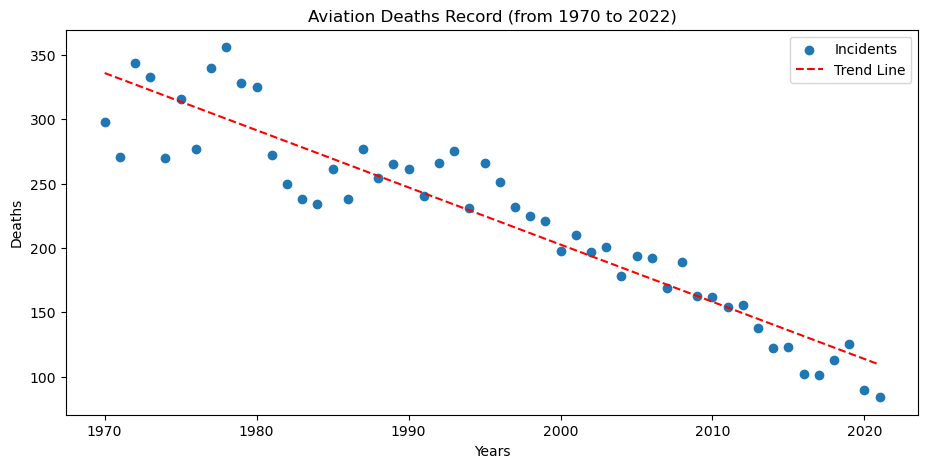

In [37]:
# defining plot size
fig = plt.figure(figsize=(11, 5))

# generating plot
plt.scatter(x,y2)

# naming plot
plt.title("Aviation Deaths Record (from 1970 to 2022)")

# naming axes
plt.xlabel("Years")
plt.ylabel("Deaths")

# displaying plot
#plt.show()

z = np.polyfit(x, y2, 1)
p = np.poly1d(z)

plt.plot(x, p(x), "r--")

plt.legend(["Incidents","Trend Line"])

plt.show()

We can clearly see a `strong` `negative` `linear` relationship between `Incidents` and `Years`, a better relationship than `Deaths`. Thus we conclude our analysis here!